In [1]:
import pandas as pd

file_path =  "/Users/bhanupodele/my_nest_scripts/yellow_tripdata_2023-07.parquet"
df = pd.read_csv(file_path)


/var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_20405/2669610775.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

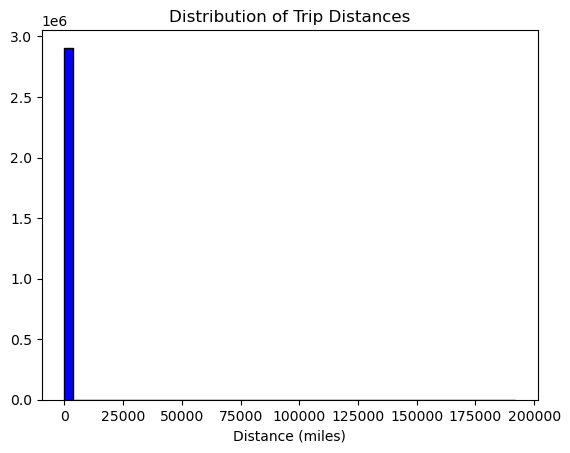

In [2]:
##1. Richness of Data - Understanding Dynamics of Taxi Usage:

import pandas as pd
import matplotlib.pyplot as plt

# Convert pickup and dropoff datetimes to pandas datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip durations in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Plotting the distribution of trip distances
plt.hist(df['trip_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel


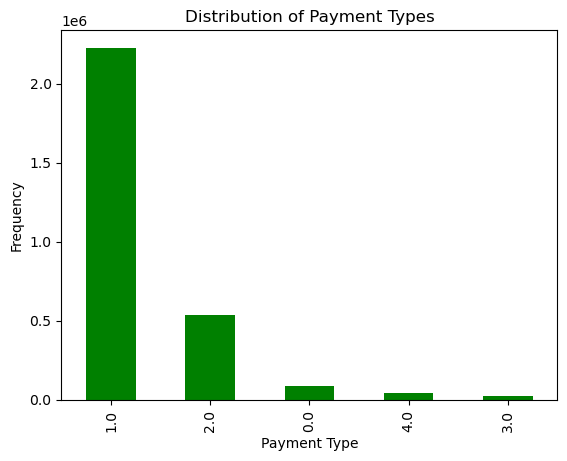

In [3]:
##2. Complexity of Transactions - Identifying Patterns or Anomalies:
# Plotting the distribution of different payment types
payment_types = df['payment_type'].value_counts()
payment_types.plot(kind='bar', color='green')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()


In [3]:
##3. Potential for Anomaly Detection - Identifying Outliers:
# Identifying outliers in trip duration
import numpy as np
q75, q25 = np.percentile(df['trip_duration'], [75, 25])
iqr = q75 - q25

# Define bounds for outliers
lower_bound = q25 - (1.5 * iqr)
upper_bound = q75 + (1.5 * iqr)

# Filter outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
print(outliers)


         Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
54               54       2.0  2023-07-01 00:13:39   2023-07-01 01:00:59   
65               65       2.0  2023-07-01 00:23:00   2023-07-01 01:16:18   
72               72       2.0  2023-07-01 00:08:37   2023-07-01 00:54:08   
74               74       2.0  2023-07-01 00:12:58   2023-07-01 01:03:29   
110             110       2.0  2023-07-01 00:01:31   2023-07-01 00:48:35   
...             ...       ...                  ...                   ...   
2906798     2906798       2.0  2023-07-31 21:31:00   2023-07-31 22:18:00   
2906809     2906809       1.0  2023-07-31 21:16:10   2023-07-31 21:58:48   
2906970     2906970       2.0  2023-07-31 22:41:00   2023-07-31 23:23:00   
2906986     2906986       1.0  2023-07-31 22:41:31   2023-07-31 23:29:44   
2907063     2907063       2.0  2023-07-31 23:26:23   2023-08-01 00:10:45   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
54           

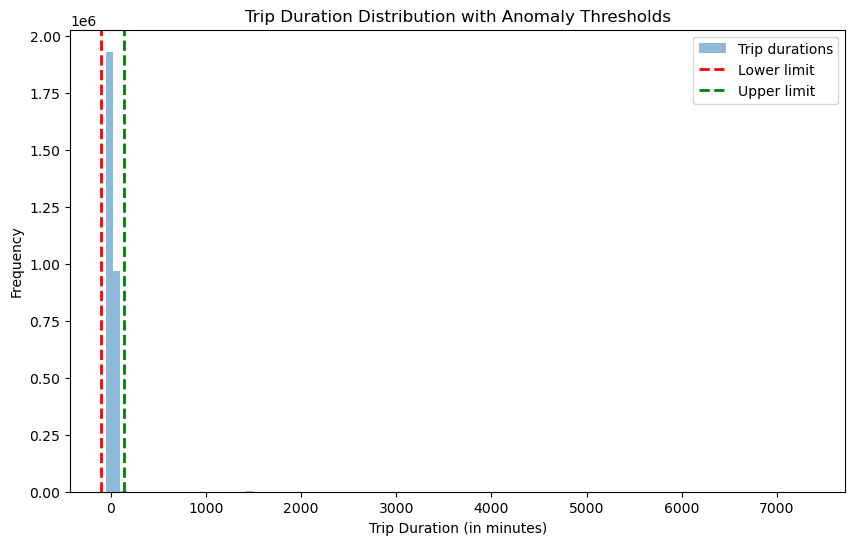

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with trip_duration already calculated
trip_duration_mean = df['trip_duration'].mean()
trip_duration_std = df['trip_duration'].std()
cutoff = trip_duration_std * 3
lower_limit = trip_duration_mean - cutoff
upper_limit = trip_duration_mean + cutoff

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['trip_duration'], bins=100, alpha=0.5, label="Trip durations")
plt.axvline(lower_limit, color='r', linestyle='dashed', linewidth=2, label='Lower limit')
plt.axvline(upper_limit, color='g', linestyle='dashed', linewidth=2, label='Upper limit')
plt.legend()
plt.title("Trip Duration Distribution with Anomaly Thresholds")
plt.xlabel("Trip Duration (in minutes)")
plt.ylabel("Frequency")
plt.show()


In [5]:
##4. Machine Learning Applications - Clustering, Regression, and Classification:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Clustering based on trip distance and fare amount
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['trip_distance', 'fare_amount']])

# Regression to predict fare amount
X_train, X_test, y_train, y_test = train_test_split(df[['trip_distance']], df['fare_amount'], test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting and checking the score
score = regressor.score(X_test, y_test)
print(f'Regression score: {score}')

# Classification to identify types of rides
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[['RatecodeID', 'payment_type']])
y = df['trip_distance'] > df['trip_distance'].median()  # Simple binary classification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


Regression score: 0.00037870928234762236


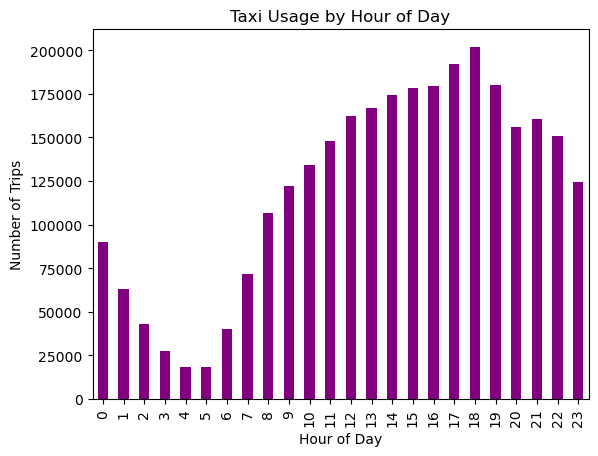

       PULocationID  DOLocationID  counts
23813         264.0         264.0   25838
21036         237.0         236.0   14636
20828         236.0         237.0   12055
21037         237.0         237.0   11317
20827         236.0         236.0    9933
20976         237.0         161.0    8725
14072         161.0         237.0    8655
10798         132.0         265.0    7802
10763         132.0         230.0    7681
10666         132.0         132.0    7395


In [6]:
##5. Operational Insights - Analyzing Service Operation:
# Peak hours analysis
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
peak_hours = df['hour_of_day'].value_counts().sort_index()
peak_hours.plot(kind='bar', color='purple')
plt.title('Taxi Usage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Most frequented routes
route_counts = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='counts')
top_routes = route_counts.sort_values(by='counts', ascending=False).head(10)
print(top_routes)


In [7]:
##Temporal Analysis for Anomaly Detection:
import pandas as pd

# Assuming df is your DataFrame and it's already been loaded.
df['trip_duration'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).dt.total_seconds() / 60

# Detecting outliers in trip durations
trip_duration_mean = df['trip_duration'].mean()
trip_duration_std = df['trip_duration'].std()
cutoff = trip_duration_std * 3

lower_limit = trip_duration_mean - cutoff
upper_limit = trip_duration_mean + cutoff

# Identifying anomalies
anomalies = df[(df['trip_duration'] < lower_limit) | (df['trip_duration'] > upper_limit)]


In [8]:
##Geospatial Hotspots:
# Aggregate data to find hotspots
hotspots = df.groupby(['PULocationID', 'DOLocationID']).agg({
    'total_amount': ['mean', 'count']
}).reset_index()

# Calculate mean and standard deviation for the fare amount
fare_mean = df['total_amount'].mean()
fare_std = df['total_amount'].std()

# Set threshold for high fare amount as mean + 2*std
high_fare_threshold = fare_mean + 2*fare_std

# Calculate mean and standard deviation for the trip count by location
trip_count_mean = df.groupby(['PULocationID', 'DOLocationID']).size().mean()
trip_count_std = df.groupby(['PULocationID', 'DOLocationID']).size().std()

# Set threshold for high trip count as mean + 2*std
high_trip_count_threshold = trip_count_mean + 2*trip_count_std

# Print the thresholds
print(f"High fare threshold: {high_fare_threshold}")
print(f"High trip count threshold: {high_trip_count_threshold}")


High fare threshold: 77.58237693476994
High trip count threshold: 1157.3003428209106


In [9]:
# Assuming 'hotspots' is a DataFrame resulting from the groupby operation used previously.

# Now, using the calculated thresholds to identify potential hotspots
high_fare_threshold = 71.34756101218771
high_trip_count_threshold = 1293.1145326727408

# Applying the thresholds to the aggregated data
potential_hotspots = hotspots[(hotspots['total_amount']['mean'] > high_fare_threshold) & 
                              (hotspots['total_amount']['count'] > high_trip_count_threshold)]

# potential_hotspots now contains locations considered as hotspots based on your criteria.


In [10]:
##Link Analysis:
import networkx as nx

# Create an undirected graph from your DataFrame
G = nx.from_pandas_edgelist(df, 'PULocationID', 'DOLocationID', edge_attr=['payment_type', 'trip_duration'], create_using=nx.Graph())

# Identify connected components which could indicate clusters of activity
connected_components = nx.connected_components(G)

# If you want to analyze the largest connected component, for example
largest_component = max(connected_components, key=len)
subgraph = G.subgraph(largest_component)


In [11]:
##Behavioral Patterns:
from sklearn.cluster import KMeans

# List out the exact column names you want to include
numeric_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']  # Add more specific column names as needed

# Convert columns to numeric
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

# Apply KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init='auto')
df['behavior_cluster'] = kmeans.fit_predict(df[numeric_columns])

# Calculate the mean for each cluster
cluster_analysis = df.groupby('behavior_cluster')[numeric_columns].mean()


In [12]:
##Predictive Modeling:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Selecting features and the target variable
# Replace these column names based on your actual dataset structure
X = df[['trip_distance', 'passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID']]
y = df['fare_amount']

# Handling NaN values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Training the RandomForest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Add here any evaluation of the model you'd like to perform


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculating Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 3.0827039803426692
Root Mean Squared Error: 9.507333748230423


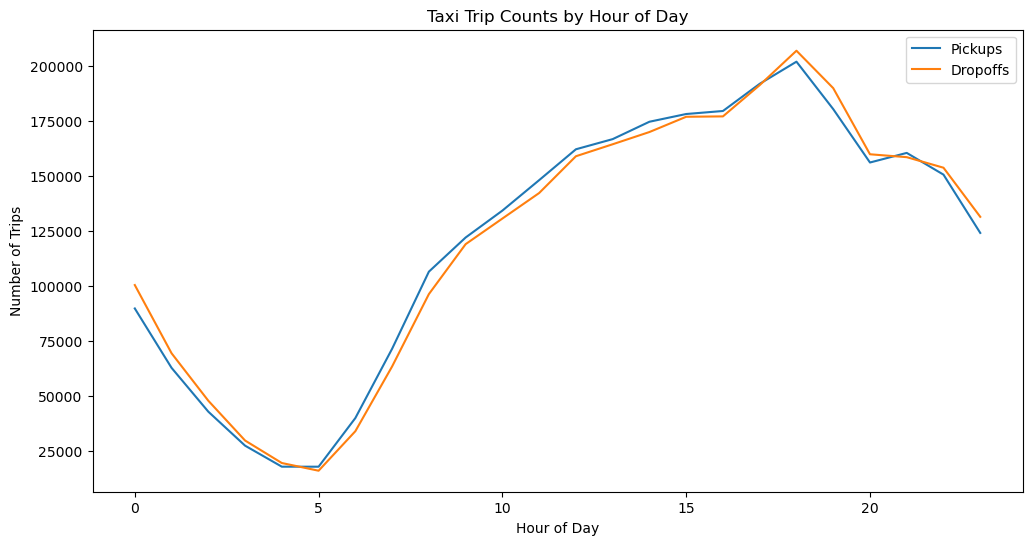

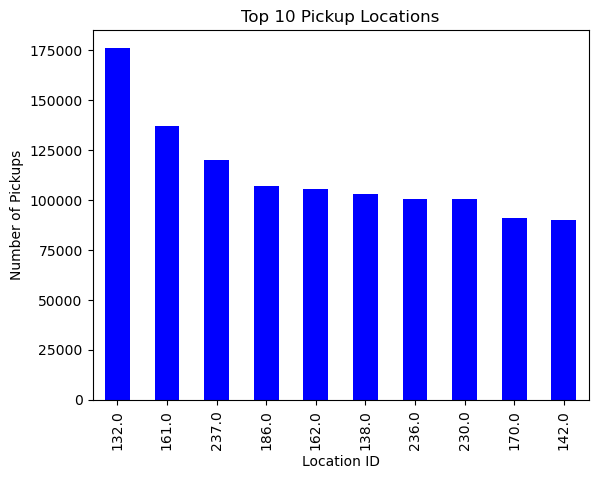

In [14]:
#Advanced Spatiotemporal Analysis:
import pandas as pd
import matplotlib.pyplot as plt

# Convert datetime columns to pandas datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Analyze the number of trips over time
pickup_counts = df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()
dropoff_counts = df['tpep_dropoff_datetime'].dt.hour.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pickup_counts, label='Pickups')
plt.plot(dropoff_counts, label='Dropoffs')
plt.title('Taxi Trip Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

# Analyze trips by location ID
top_pickup_locations = df['PULocationID'].value_counts().head(10)
top_dropoff_locations = df['DOLocationID'].value_counts().head(10)

# Plotting top pickup locations
top_pickup_locations.plot(kind='bar', color='blue')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.show()

# Similarly, plot for top dropoff locations


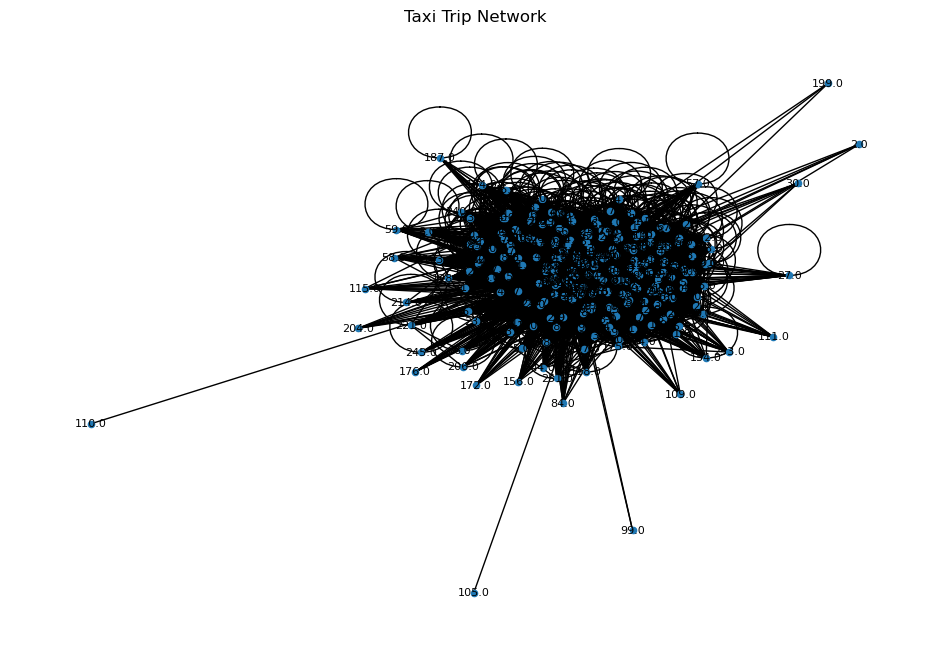

In [15]:
##Graph-Based Analysis
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges from the dataset
for index, row in df.iterrows():
    G.add_edge(row['PULocationID'], row['DOLocationID'])

# Use a spring layout for the graph visualization
pos = nx.spring_layout(G)

# Plotting the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Taxi Trip Network')
plt.axis('off')  # Hide the axes
plt.show()


In [16]:
pip install brian2

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Membrane potential')

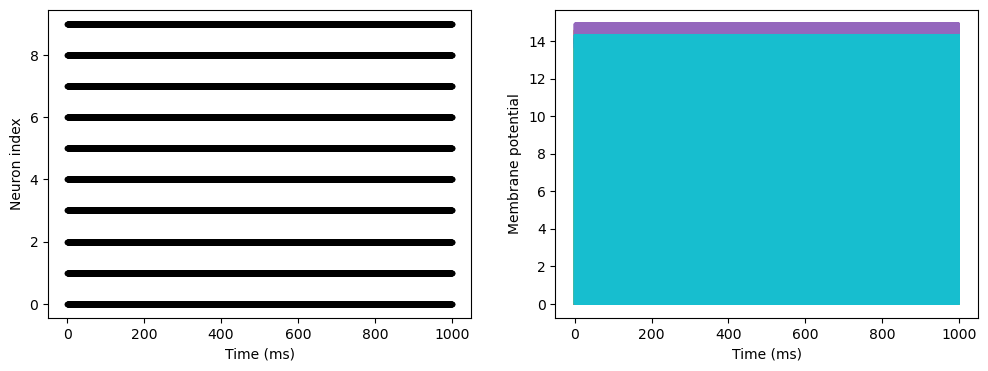

In [17]:
#Neuromorphic Computing Models
from brian2 import *

# Define simulation parameters
start_scope()
num_neurons = 10
simulation_time = 1*second

# Define the model
eqs = '''
dv/dt = (0.04*v**2+5*v+140-u+I)/ms : 1
du/dt = a*(b*v-u)/ms : 1
I : 1
a : 1
b : 1
c : 1
d : 1
'''

# Create a neuron group
neuron_group = NeuronGroup(num_neurons, eqs, threshold='v>30', reset='v=c; u+=d', method='euler')
neuron_group.v = 'c'
neuron_group.u = 'b*v'
neuron_group.I = 'randn()*5'

# Monitor variables
spike_mon = SpikeMonitor(neuron_group)
v_mon = StateMonitor(neuron_group, 'v', record=True)

# Run the simulation
run(simulation_time)

# Plot the results
figure(figsize=(12, 4))
subplot(121)
plot(spike_mon.t/ms, spike_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(v_mon.t/ms, v_mon.v.T)
xlabel('Time (ms)')
ylabel('Membrane potential')


In [18]:
#Isolation Forest:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Selecting features for anomaly detection
features = ['trip_distance', 'fare_amount']
X = df[features]

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model
iso_forest.fit(X)

# Detect anomalies
df['anomaly_iso'] = iso_forest.predict(X)

# Filter and view anomalies
anomalies = df[df['anomaly_iso'] == -1]


In [19]:
# Drop rows with any NaN values in the selected features
X_clean = X.dropna()


In [20]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
# This will fill in the missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Perform the imputation on the selected features
X_imputed = imputer.fit_transform(X)


In [21]:
import pandas as pd


# Option 1: Explicitly specify the data type for columns known to cause issues
df = pd.read_csv(file_path, dtype={'column_name': str})

# Option 2: Allow pandas to use more memory to determine the data types
df = pd.read_csv(file_path, low_memory=False)


WARNING    /var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_7627/3483702001.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, dtype={'column_name': str})
 [py.warnings]


In [22]:
#Predictive Modeling for Demand and Supply:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Convert datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Feature engineering: Extract hour of day as a feature
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Select features for the model
# Add or remove features based on your analysis
features = ['passenger_count', 'trip_distance', 'pickup_hour', 'PULocationID', 'DOLocationID']

# Target variable
target = 'total_amount'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Initialize the Linear Regression model
from sklearn.impute import SimpleImputer

# Initialize the imputer
# This will fill in the missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the training data
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Impute the missing values in the test data
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model with the imputed data
model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 586.6099433743358


WARNING    /var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_7627/82454351.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
 [py.warnings]


       trip_distance   fare_amount    tip_amount  trip_duration
count   2.907108e+06  2.907108e+06  2.907108e+06   2.907108e+06
mean    4.489381e+00  1.970319e+01  3.446826e+00   1.707664e+01
std     2.578832e+02  1.983865e+01  4.136126e+00   4.099461e+01
min     0.000000e+00 -6.029000e+02 -9.500000e+01  -5.711667e+01
25%     1.060000e+00  9.300000e+00  0.000000e+00   7.466667e+00
50%     1.810000e+00  1.350000e+01  2.720000e+00   1.240000e+01
75%     3.580000e+00  2.190000e+01  4.340000e+00   2.033333e+01
max     1.919450e+05  1.040400e+03  4.430500e+02   7.348833e+03


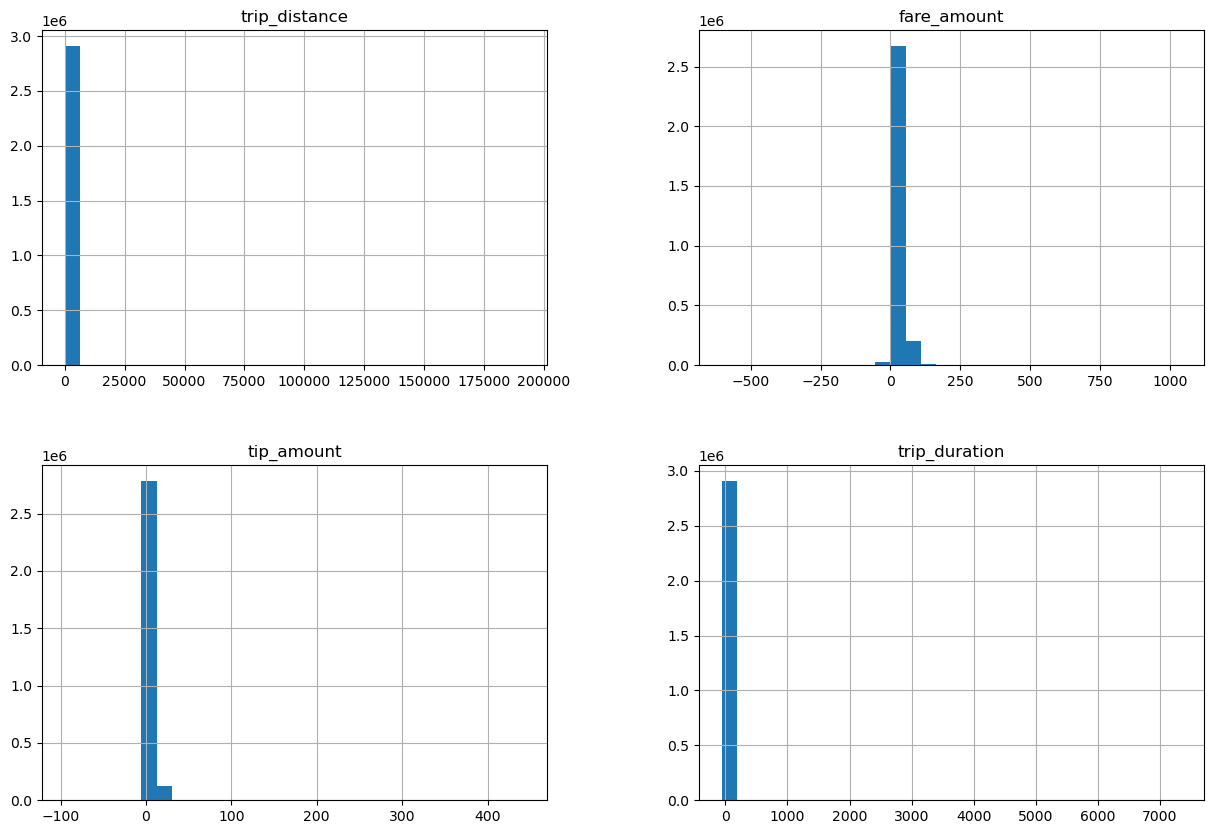

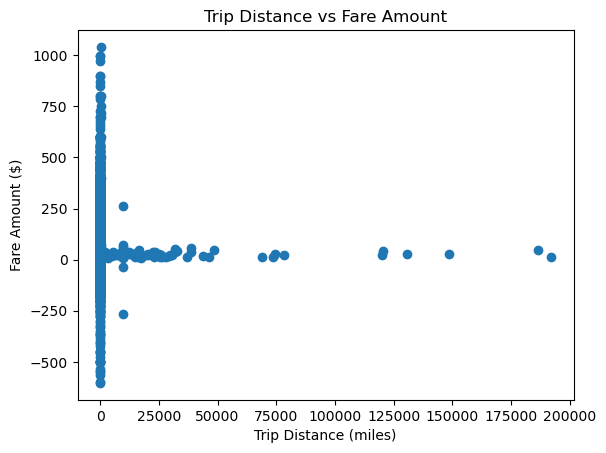

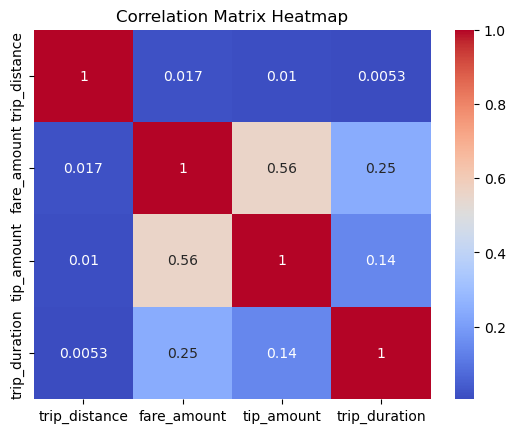

In [24]:
#Exploratory Data Analysis (EDA):
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (replace 'your_data.csv' with the path to your dataset)
df = pd.read_csv(file_path)

# Convert pickup and dropoff to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Extract hour of day, day of week, and day of month from pickup datetime
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_of_month'] = df['tpep_pickup_datetime'].dt.day

# Display summary statistics for numerical features
print(df[['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']].describe())

# Plot histograms for numerical features
df[['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']].hist(bins=30, figsize=(15, 10))
plt.show()

# Create scatter plots for trip distance vs fare amount
plt.scatter(df['trip_distance'], df['fare_amount'])
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs Fare Amount')
plt.show()

# Plot correlation matrix heatmap
corr_matrix = df[['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset

file_path =  "/Users/bhanupodele/my_nest_scripts/yellow_tripdata_2023-07.parquet"
df = pd.read_csv(file_path)


# Drop the 'Unnamed: 0' column as it seems to be an index
df.drop('Unnamed: 0', axis=1, inplace=True)

# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# You can fill missing values with a specified value or a computed value (mean, median)
# Example: df['column_name'].fillna(df['column_name'].median(), inplace=True)

# Convert datetime fields to pandas datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Feature Engineering
# Example: Extracting hour of day from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Normalization/Standardization
numeric_features = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encoding Categorical Variables
categorical_features = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer for applying transformations to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying transformations
df_processed = preprocessor.fit_transform(df)

# Now df_processed is ready for analysis


WARNING    /var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_7627/918469066.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
 [py.warnings]


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          85086
trip_distance                0
RatecodeID               85086
store_and_fwd_flag       85086
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     85086
Airport_fee              85086
dtype: int64


In [26]:
#Overall Missing Value Analysis:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percentage})
print(missing_info)


                       Count  Percentage
VendorID                   0    0.000000
tpep_pickup_datetime       0    0.000000
tpep_dropoff_datetime      0    0.000000
passenger_count        85086    2.926826
trip_distance              0    0.000000
RatecodeID             85086    2.926826
store_and_fwd_flag     85086    2.926826
PULocationID               0    0.000000
DOLocationID               0    0.000000
payment_type               0    0.000000
fare_amount                0    0.000000
extra                      0    0.000000
mta_tax                    0    0.000000
tip_amount                 0    0.000000
tolls_amount               0    0.000000
improvement_surcharge      0    0.000000
total_amount               0    0.000000
congestion_surcharge   85086    2.926826
Airport_fee            85086    2.926826
pickup_hour                0    0.000000


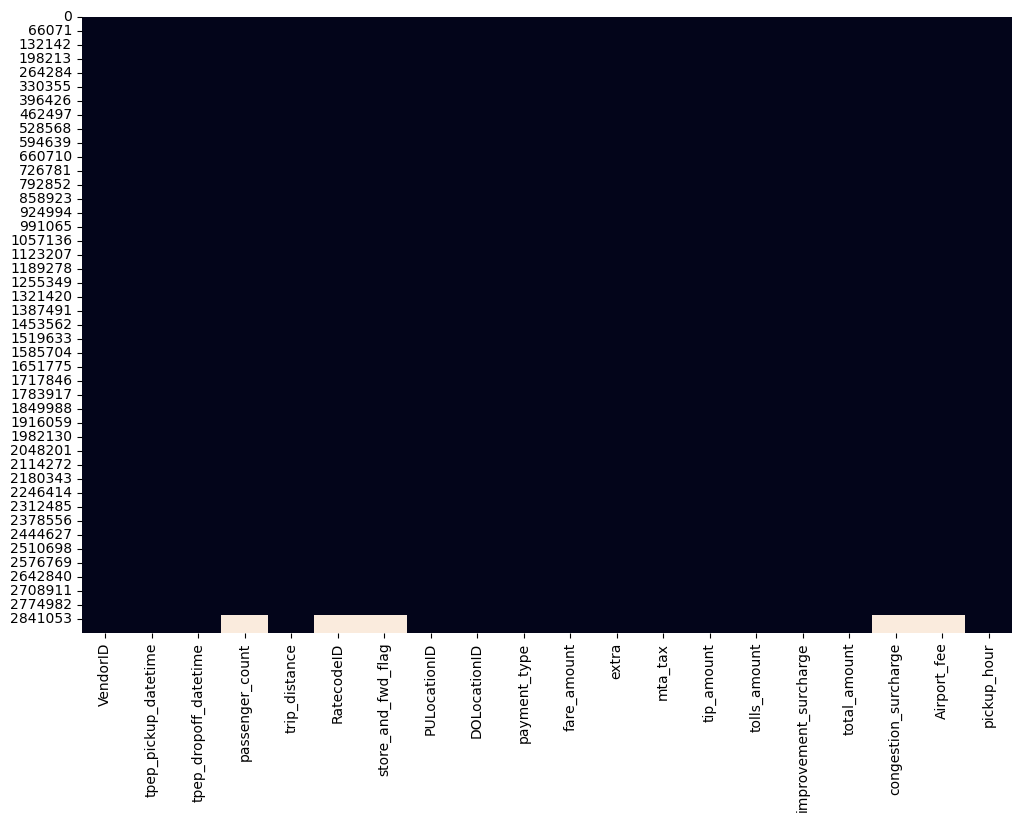

In [27]:
#Missing Data Pattern Analysis:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()


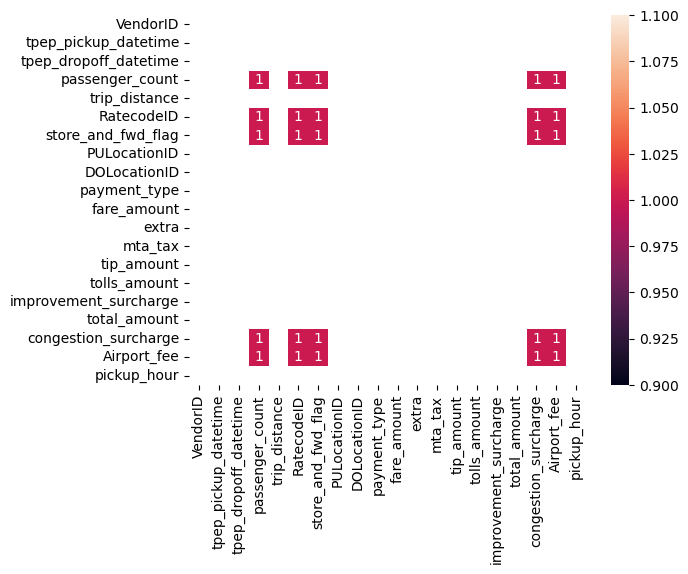

In [28]:
#Correlation of Missingness:
missing_corr = df.isnull().corr()
sns.heatmap(missing_corr, annot=True)
plt.show()


In [29]:
#Analyzing Missing Values with Respect to Other Features:
#Example: Analyzing missing 'tip_amount' based on 'payment_type'
df.groupby('payment_type')['tip_amount'].apply(lambda x: x.isnull().sum())


payment_type
0.0    0
1.0    0
2.0    0
3.0    0
4.0    0
Name: tip_amount, dtype: int64

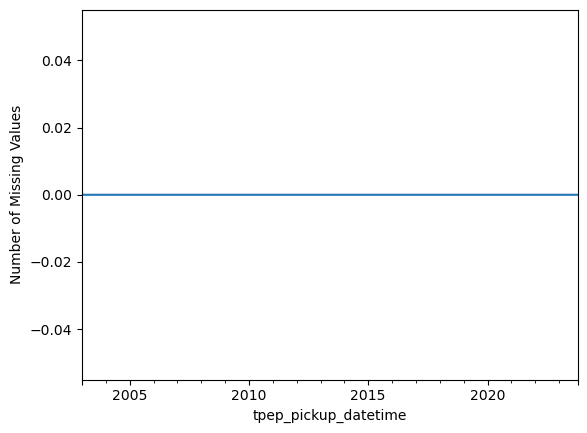

In [30]:
#Missing Value Patterns Over Time:
# Example: Counting missing values in 'fare_amount' over time
df.set_index('tpep_pickup_datetime')['fare_amount'].isnull().resample('D').sum().plot()
plt.ylabel('Number of Missing Values')
plt.show()


In [31]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


<Axes: >

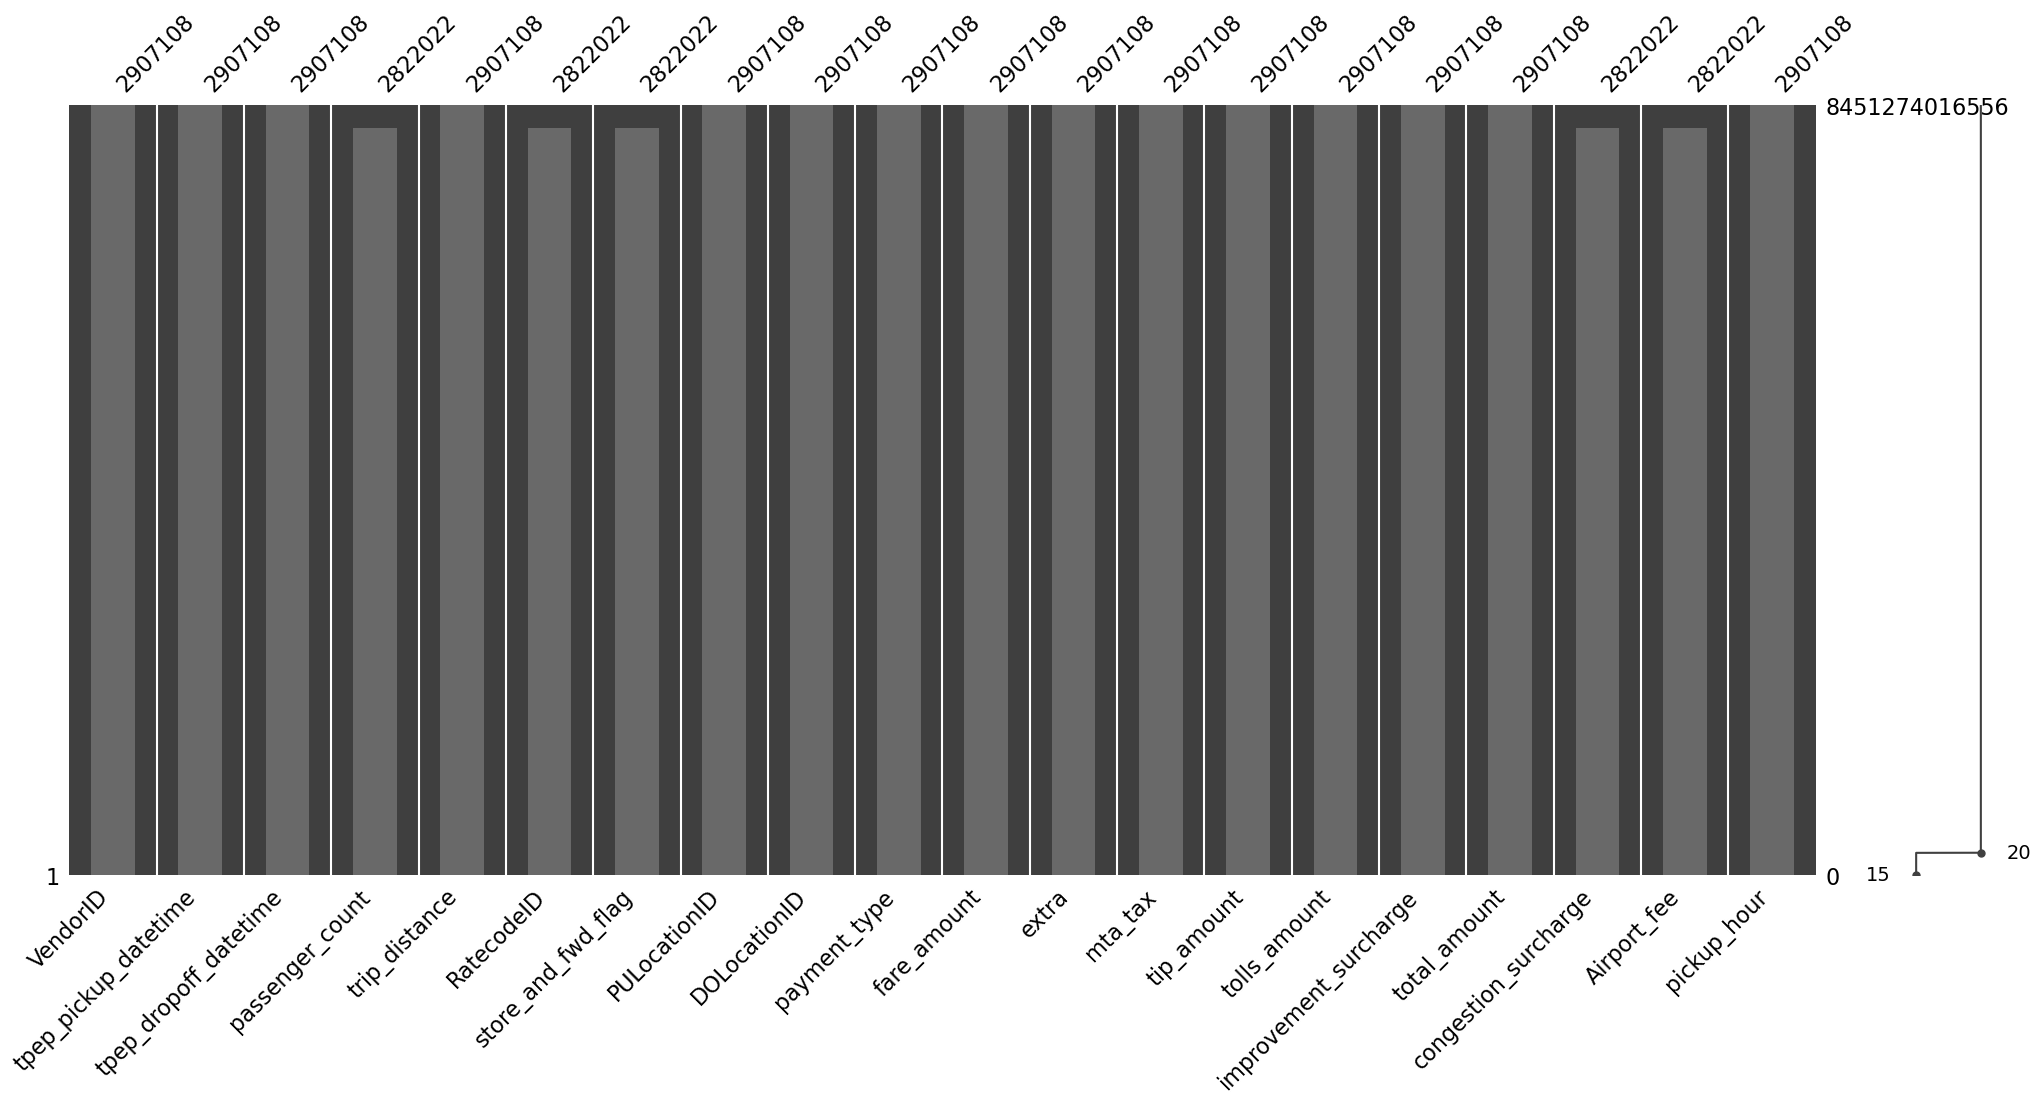

In [32]:
#Little's MCAR Test:
import missingno as msno

# Visualizing missing data
msno.matrix(df)  # For a matrix plot of missing values
msno.bar(df)     # For a bar chart of missing values



In [33]:
#Missing Values Imputation:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or median, most_frequent, constant
df[['passenger_count']] = imputer.fit_transform(df[['passenger_count']])


In [34]:
#Datetime Features Extraction:

# First, convert the 'tpep_pickup_datetime' to a datetime type if not already done
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Now you can safely extract datetime properties
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [35]:
#Count the number of trips per pickup location (PULocationID):
pickup_location_counts = df['PULocationID'].value_counts()
print(pickup_location_counts)


PULocationID
132.0    176228
161.0    136867
237.0    119947
186.0    107188
162.0    105676
          ...  
111.0         3
59.0          2
187.0         2
245.0         1
30.0          1
Name: count, Length: 255, dtype: int64


In [36]:
#Count the number of trips per dropoff location (DOLocationID):
dropoff_location_counts = df['DOLocationID'].value_counts()
print(dropoff_location_counts)


DOLocationID
161.0    115609
236.0    106858
237.0    105550
230.0     98011
170.0     89361
          ...  
111.0        22
204.0        17
99.0          3
110.0         1
105.0         1
Name: count, Length: 261, dtype: int64


In [37]:
#Analyze the distribution of fare amounts across different pickup locations:
avg_fare_per_pickup_location = df.groupby('PULocationID')['fare_amount'].mean()
print(avg_fare_per_pickup_location)


PULocationID
1.0      88.410302
2.0      58.080000
3.0      31.862840
4.0      17.640293
5.0      64.655814
           ...    
261.0    23.359188
262.0    14.947045
263.0    13.694821
264.0    20.651410
265.0    84.147837
Name: fare_amount, Length: 255, dtype: float64


In [38]:
#Analyze the distribution of trip durations across different pickup locations:
# Ensure that 'trip_duration' is a numerical column representing the duration in minutes or seconds.
# Convert pickup and dropoff datetimes to pandas datetime objects if not already done
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate the trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Now you can calculate the average trip duration per pickup location
avg_duration_per_pickup_location = df.groupby('PULocationID')['trip_duration'].mean()
print(avg_duration_per_pickup_location)



PULocationID
1.0       7.293319
2.0      47.010000
3.0      32.075103
4.0      15.869441
5.0      73.129845
           ...    
261.0    22.104833
262.0    12.627340
263.0    11.562492
264.0    17.014369
265.0    15.335396
Name: trip_duration, Length: 255, dtype: float64


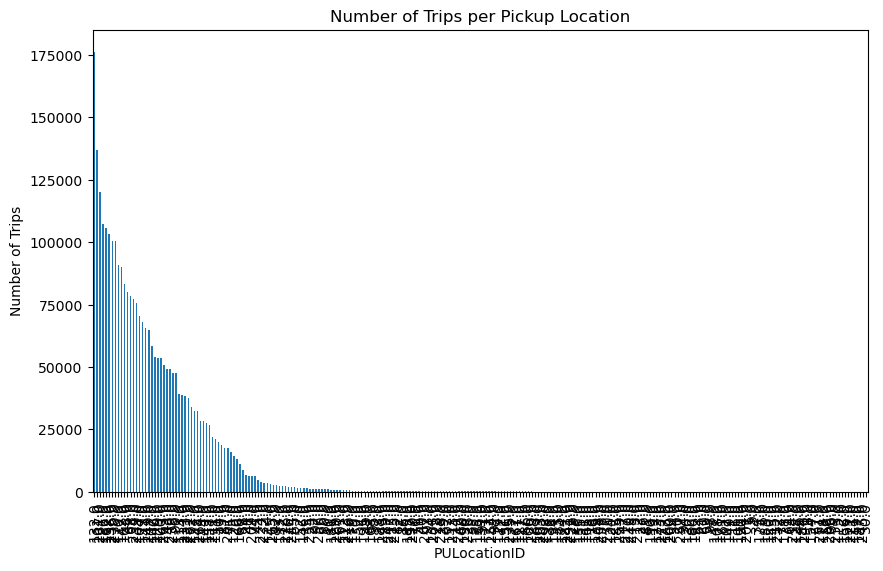

In [39]:
#Visualize the number of trips per pickup location:
import matplotlib.pyplot as plt

pickup_location_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Trips per Pickup Location')
plt.xlabel('PULocationID')
plt.ylabel('Number of Trips')
plt.show()


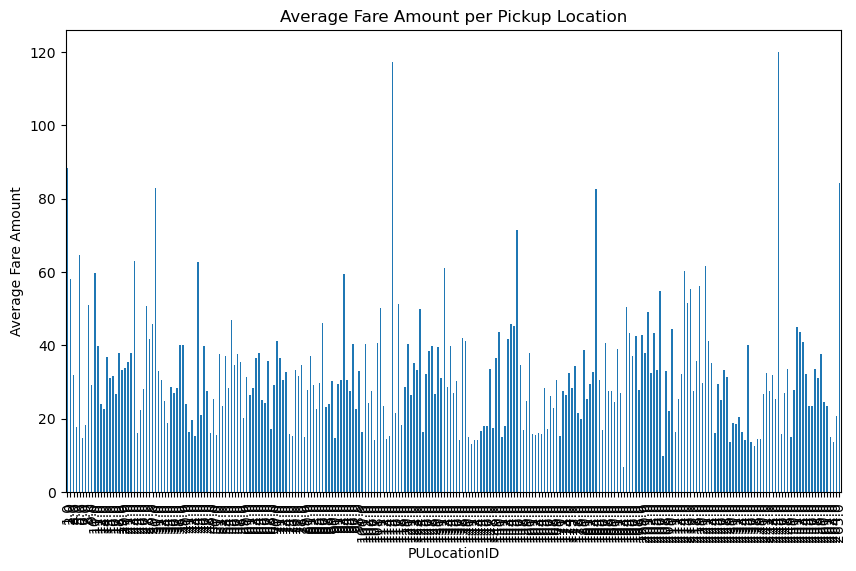

In [40]:
#Visualize the average fare amount per pickup location:
avg_fare_per_pickup_location.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare Amount per Pickup Location')
plt.xlabel('PULocationID')
plt.ylabel('Average Fare Amount')
plt.show()


In [41]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [42]:
#Anomalies/Outliers Handling:
# Assuming Q1 and Q3 are the first and third quartiles
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR)))]


In [43]:
#Feature Selection:

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Assuming 'df' is your DataFrame and you want to impute all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])  # This will select only numeric columns

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
numeric_cols_imputed = imputer.fit_transform(numeric_cols)

# If you want to put these imputed values back into the original DataFrame:
df[numeric_cols.columns] = numeric_cols_imputed



In [44]:
#Text Data Preprocessing:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download stopwords from NLTK
nltk.download('stopwords')

# Create a stemmer object
stemmer = PorterStemmer()

# English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords and stem each word
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    
    return text


text_column = 'tpep_pickup_datetime'
df[text_column + '_processed'] = df[text_column].astype(str).apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhanupodele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month


In [46]:
df['store_and_fwd_flag_encoded'] = df['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)


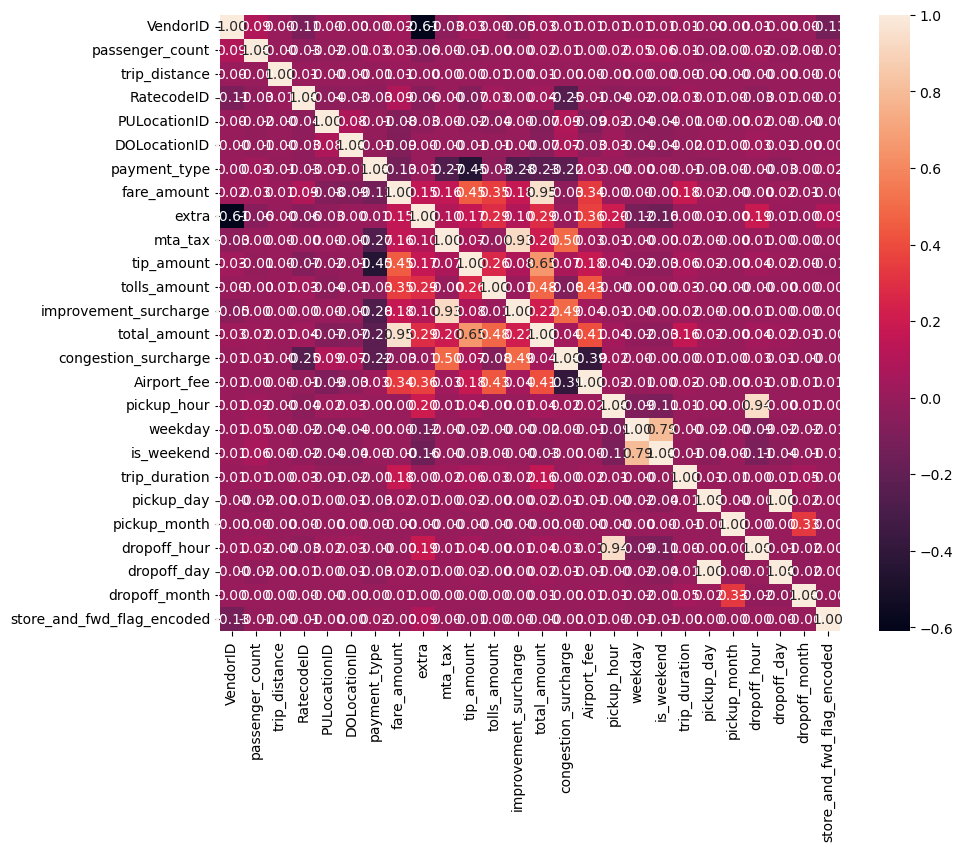

In [47]:
#Exploratory Data Analysis (EDA):
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()


In [48]:
#Data Partitioning:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('fare_amount', axis=1), df['fare_amount'], test_size=0.2, random_state=42)


In [49]:
# Check the data type of each column
column_data_types = df.dtypes

# Print columns that are of object type, which may contain text
text_columns = column_data_types[column_data_types == 'object'].index.tolist()
print("Columns that may contain text data:", text_columns)


Columns that may contain text data: ['store_and_fwd_flag', 'tpep_pickup_datetime_processed']


In [50]:
#Pipeline Integration:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'trip_duration']
categorical_features = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'cluster', 'hour_of_day', 'behavior_cluster']

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessing_pipeline = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


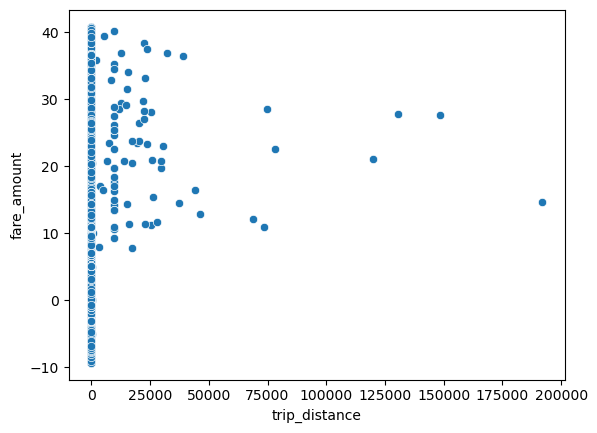

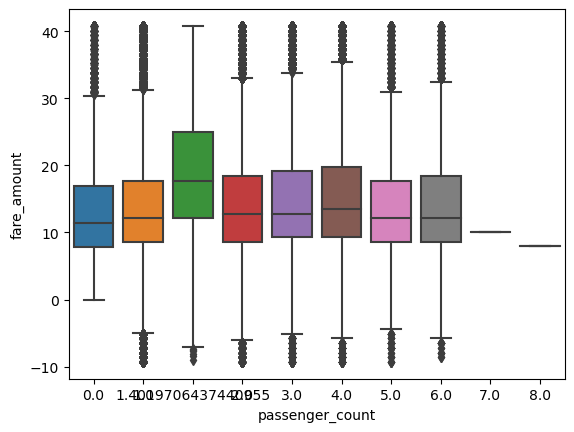

In [51]:
#Advanced EDA - Visualizing Relationships:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for fare amount vs trip distance
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.show()

# Box plot for passenger count vs fare amount
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.show()


In [52]:
#Outlier Detection and Handling:
# Detecting outliers in 'fare_amount'
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR)))]


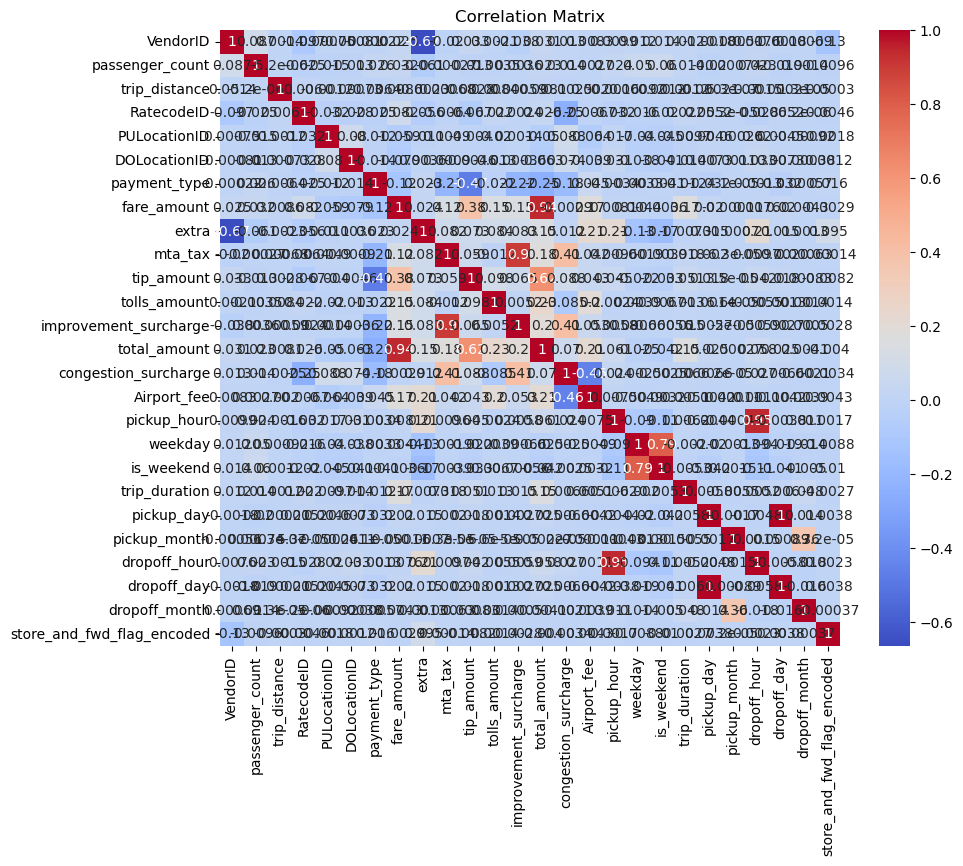

In [53]:
#Correlation Analysis:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [54]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'weekday', 'is_weekend', 'trip_duration',
       'tpep_pickup_datetime_processed', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded'],
      dtype='object')


In [55]:
#Advanced Feature Engineering - Peak Hours:

# Convert 'tpep_pickup_datetime' to a datetime object if it's not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from 'tpep_pickup_datetime'
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Now define peak hours (e.g., 7-9 AM and 4-6 PM)
df['is_peak_hour'] = df['pickup_hour'].apply(lambda x: 1 if x in range(7, 10) or x in range(16, 19) else 0)


In [56]:
#Preparing for Machine Learning - Train-Test Split:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('fare_amount', axis=1)  # Assuming 'fare_amount' is the target
y = df['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'weekday', 'is_weekend', 'trip_duration',
       'tpep_pickup_datetime_processed', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour'],
      dtype='object')


In [58]:
from pandas.tseries.holiday import USFederalHolidayCalendar

# Create a calendar object
cal = USFederalHolidayCalendar()

# Define a date range for your DataFrame, this should cover all dates in your DataFrame
start_date = df['tpep_pickup_datetime'].min()
end_date = df['tpep_pickup_datetime'].max()

# Get a list of holidays within the range
holidays = cal.holidays(start=start_date, end=end_date)

# Create the 'is_holiday' column
df['is_holiday'] = df['tpep_pickup_datetime'].dt.date.isin(holidays.date).astype(int)


In [59]:
# Log transformation example
df['log_trip_distance'] = np.log1p(df['trip_distance'])


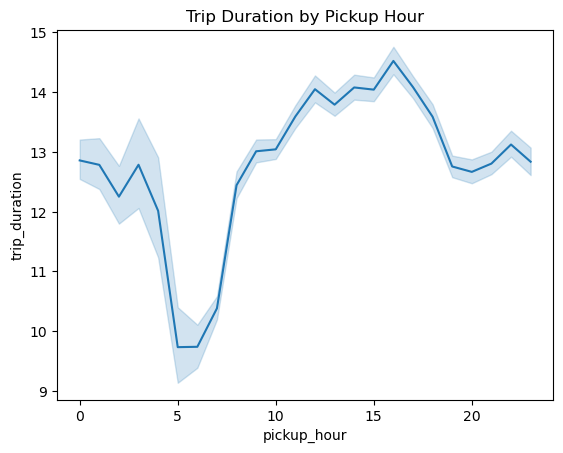

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze trip duration by hour of day
sns.lineplot(x='pickup_hour', y='trip_duration', data=df)
plt.title('Trip Duration by Pickup Hour')
plt.show()


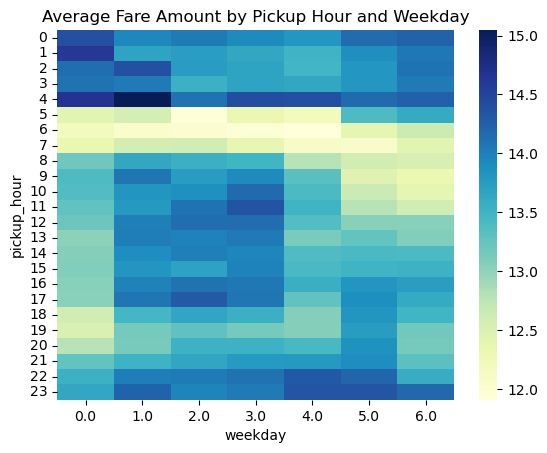

In [61]:
# Heatmap of average fare amount by pickup hour and day of the week
pivot_table = df.pivot_table(values='fare_amount', index='pickup_hour', columns='weekday', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Average Fare Amount by Pickup Hour and Weekday')
plt.show()


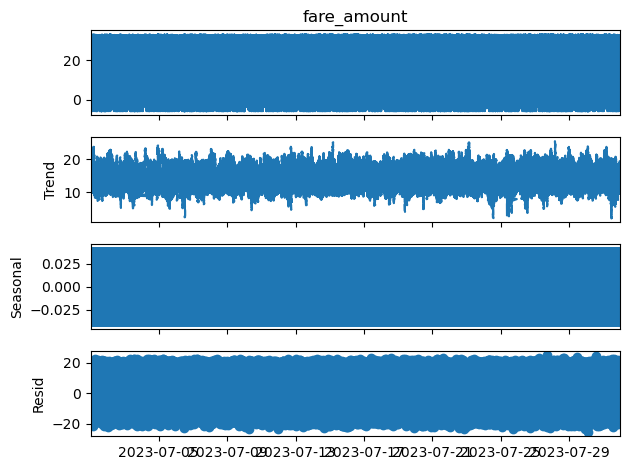

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure your datetime column is set as the index
df.set_index('tpep_pickup_datetime', inplace=True)

# Seasonal decomposition of fare_amount
result = seasonal_decompose(df['fare_amount'], model='additive', period=24)  # assuming hourly data
result.plot()
plt.show()


In [63]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")
print(nlp("I love data science"))


WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
 [py.warnings]
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998250603675842}]


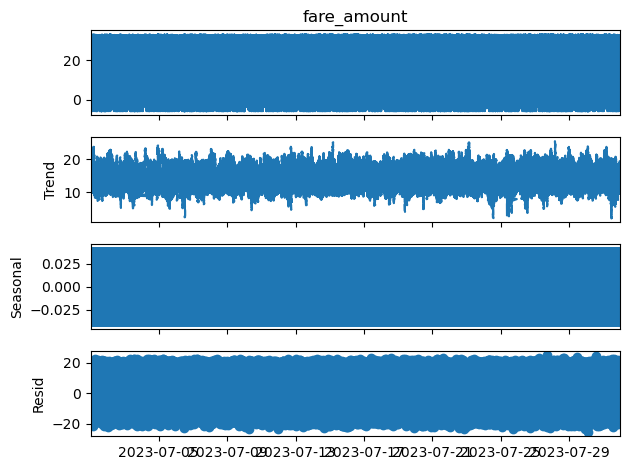

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Convert the processed pickup datetime to datetime format and set as index
df['tpep_pickup_datetime_processed'] = pd.to_datetime(df['tpep_pickup_datetime_processed'])
df.set_index('tpep_pickup_datetime_processed', inplace=True)

# Perform seasonal decomposition on 'fare_amount'
result = seasonal_decompose(df['fare_amount'], model='additive', period=24)  # Adjust the period based on your data's frequency
result.plot()
plt.show()



In [65]:
import numpy as np
%matplotlib inline
# Example criteria: fare_amount that are 3 standard deviations from the mean
fare_mean = df['fare_amount'].mean()
fare_std = df['fare_amount'].std()
anomaly_threshold_upper = fare_mean + 3 * fare_std
anomaly_threshold_lower = fare_mean - 3 * fare_std

df['anomaly'] = np.where((df['fare_amount'] > anomaly_threshold_upper) | 
                         (df['fare_amount'] < anomaly_threshold_lower), 1, 0)

# Now you can define your features (X) and target (y)
X = df.drop('anomaly', axis=1)
y = df['anomaly']


In [66]:
#Encoding Categorical Variables: 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
categorical_features = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
encoded_features = encoder.fit_transform(df[categorical_features]).toarray()


In [67]:
#Normalizing Numerical Variables:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [68]:
print(df.columns)

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'weekday',
       'is_weekend', 'trip_duration', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour', 'is_holiday',
       'log_trip_distance', 'anomaly'],
      dtype='object')


In [69]:
# Convert all numeric columns to float32 for TensorFlow compatibility
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].astype('float32')


In [70]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'weekday',
       'is_weekend', 'trip_duration', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour', 'is_holiday',
       'log_trip_distance', 'anomaly'],
      dtype='object')

In [71]:
# Example: Normalize/Standardize or Log Transform 'fare_amount' if it's the target
df['fare_amount'] = np.log1p(df['fare_amount'])  # Log transform to handle skewness


WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
 [py.warnings]


In [72]:
X = df.drop(['tpep_dropoff_datetime'], axis=1)


In [73]:
# Assuming 'tpep_dropoff_datetime' is in datetime format
df['dropoff_minute'] = df['tpep_dropoff_datetime'].dt.minute


In [74]:
# Assuming 'fare_amount' is the target variable
y = df['fare_amount']
X = df.drop(['VendorID', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 
             'fare_amount', 'congestion_surcharge', 'Airport_fee', 
             'store_and_fwd_flag_encoded', 'anomaly'], axis=1)


In [75]:
# Remove rows where 'fare_amount' is NaN
df_clean = df.dropna(subset=['fare_amount'])

# Select features excluding 'fare_amount' and any non-numeric columns as X
X_clean = df_clean.drop(['fare_amount', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 
                         'congestion_surcharge', 'Airport_fee', 'store_and_fwd_flag_encoded'], axis=1)

# Set 'fare_amount' as your target variable y
y_clean = df_clean['fare_amount']

# Proceed with feature selection
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X_clean, y_clean)


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and includes datetime transformations already applied
# Drop the non-numeric or non-relevant columns
df_numeric = df.drop(['tpep_dropoff_datetime', 'store_and_fwd_flag', 'store_and_fwd_flag_encoded'], axis=1)

# Convert all columns to float32, except datetime columns already handled
for col in df_numeric.select_dtypes(exclude=['datetime64']).columns:
    df_numeric[col] = df_numeric[col].astype('float32')

# Handle NaN values for simplicity, consider a more nuanced approach for your use case
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Splitting dataset into features and target variable
X = df_numeric.drop('fare_amount', axis=1)
y = df_numeric['fare_amount'].astype('float32')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure y_train doesn't have NaNs if it still does
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Proceed with TensorFlow model fitting here


In [77]:
import pandas as pd

# Assuming df is your DataFrame
# Ensure 'tpep_dropoff_datetime' is in datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract features
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
df['dropoff_weekday'] = df['tpep_dropoff_datetime'].dt.weekday  # 0=Monday, 6=Sunday

# Drop the original 'tpep_dropoff_datetime' if you won't use it in raw format
# df.drop('tpep_dropoff_datetime', axis=1, inplace=True)


In [78]:
#LST Model using TensorFlow and Keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf

# Assuming df is your DataFrame and 'target' is your target variable
X = df.drop(['tpep_dropoff_datetime', 'fare_amount'], axis=1)  # Drop non-numeric and target column
y = df['fare_amount']

# Convert categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer([("encoder", OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Feature Selection or Dimensionality Reduction (uncomment as needed)
# X_reduced = PCA(n_components=10).fit_transform(X_encoded)
# X_selected = SelectKBest(f_classif, k=10).fit_transform(X_encoded, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TensorFlow model (example simple model)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)  # Adjust based on regression or classification task
])
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss based on the task
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
55189/55189 [==============================] - 25s 447us/step - loss: nan - val_loss: nan
Epoch 2/10
55189/55189 [==============================] - 24s 440us/step - loss: nan - val_loss: nan
Epoch 3/10
55189/55189 [==============================] - 24s 440us/step - loss: nan - val_loss: nan
Epoch 4/10
55189/55189 [==============================] - 24s 438us/step - loss: nan - val_loss: nan
Epoch 5/10
55189/55189 [==============================] - 24s 436us/step - loss: nan - val_loss: nan
Epoch 6/10
55189/55189 [==============================] - 24s 441us/step - loss: nan - val_loss: nan
Epoch 7/10
55189/55189 [==============================] - 25s 446us/step - loss: nan - val_loss: nan
Epoch 8/10
55189/55189 [==============================] - 24s 440us/step - loss: nan - val_loss: nan
Epoch 9/10
55189/55189 [==============================] - 24s 442us/step - loss: nan - val_loss: nan
Epoch 10/10
55189/55189 [==============================] - 24s 440us/step - loss: nan - val

In [79]:
#CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Adjust input_shape according to your data
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 346561 (1.32 MB)
Trainable params: 346561 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [80]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'df' is your DataFrame and 'anomaly' is the target variable

# Identify categorical columns
categorical_cols = ['store_and_fwd_flag']  # Add other categorical columns if necessary

# One-hot encode categorical data and scale numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.select_dtypes(include=['float64', 'int64']).columns.tolist()),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Apply transformations
X = df.drop(['tpep_dropoff_datetime', 'anomaly'], axis=1)
y = df['anomaly']
X_preprocessed = preprocessor.fit_transform(X)



In [81]:
X = df.drop(['store_and_fwd_flag', 'tpep_dropoff_datetime', 'anomaly'], axis=1)  # Updated line


In [82]:
# Assuming df is your full DataFrame
X = df.drop(['store_and_fwd_flag', 'tpep_dropoff_datetime', 'anomaly'], axis=1)

# Ensure there's no 'N' or other string values in numeric columns
print(X.select_dtypes(include=['object']).columns)  # This should ideally return an empty list

# Now, split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index([], dtype='object')


In [83]:
print(X_train.dtypes)


VendorID                      float32
passenger_count               float32
trip_distance                 float32
RatecodeID                    float32
PULocationID                  float32
DOLocationID                  float32
payment_type                  float32
fare_amount                   float32
extra                         float32
mta_tax                       float32
tip_amount                    float32
tolls_amount                  float32
improvement_surcharge         float32
total_amount                  float32
congestion_surcharge          float32
Airport_fee                   float32
pickup_hour                     int32
weekday                       float32
is_weekend                    float32
trip_duration                 float32
pickup_day                      int32
pickup_month                    int32
dropoff_hour                    int32
dropoff_day                     int32
dropoff_month                   int32
store_and_fwd_flag_encoded    float32
is_peak_hour

In [84]:
# Check for null values
print(X_train.isnull().sum())


VendorID                           0
passenger_count                    0
trip_distance                      0
RatecodeID                         0
PULocationID                       0
DOLocationID                       0
payment_type                       0
fare_amount                   243957
extra                              0
mta_tax                            0
tip_amount                         0
tolls_amount                       0
improvement_surcharge              0
total_amount                       0
congestion_surcharge               0
Airport_fee                        0
pickup_hour                        0
weekday                            0
is_weekend                         0
trip_duration                      0
pickup_day                         0
pickup_month                       0
dropoff_hour                       0
dropoff_day                        0
dropoff_month                      0
store_and_fwd_flag_encoded         0
is_peak_hour                       0
i

In [85]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Re-attempt scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [86]:
#feedforward neural network for classification:model using TensorFlow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test have been defined earlier

# Normalizing the dataset
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification, thus 'sigmoid'
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
49057/49057 [==============================] - 27s 538us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.7487e-16 - val_accuracy: 1.0000
Epoch 2/10
49057/49057 [==============================] - 26s 539us/step - loss: 4.1803e-09 - accuracy: 1.0000 - val_loss: 1.2746e-17 - val_accuracy: 1.0000
Epoch 3/10
49057/49057 [==============================] - 26s 537us/step - loss: 2.3252e-09 - accuracy: 1.0000 - val_loss: 3.7322e-18 - val_accuracy: 1.0000
Epoch 4/10
49057/49057 [==============================] - 26s 537us/step - loss: 4.4204e-09 - accuracy: 1.0000 - val_loss: 1.3243e-18 - val_accuracy: 1.0000
Epoch 5/10
49057/49057 [==============================] - 26s 537us/step - loss: 5.3553e-11 - accuracy: 1.0000 - val_loss: 8.2291e-19 - val_accuracy: 1.0000
Epoch 6/10
49057/49057 [==============================] - 26s 535us/step - loss: 1.7857e-10 - accuracy: 1.0000 - val_loss: 2.2794e-19 - val_accuracy: 1.0000
Epoch 7/10
49057/49057 [==============================] - 26s 

In [87]:
df.dtypes

VendorID                             float32
tpep_dropoff_datetime         datetime64[ns]
passenger_count                      float32
trip_distance                        float32
RatecodeID                           float32
store_and_fwd_flag                    object
PULocationID                         float32
DOLocationID                         float32
payment_type                         float32
fare_amount                          float32
extra                                float32
mta_tax                              float32
tip_amount                           float32
tolls_amount                         float32
improvement_surcharge                float32
total_amount                         float32
congestion_surcharge                 float32
Airport_fee                          float32
pickup_hour                            int32
weekday                              float32
is_weekend                           float32
trip_duration                        float32
pickup_day

In [88]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'weekday',
       'is_weekend', 'trip_duration', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour', 'is_holiday',
       'log_trip_distance', 'anomaly', 'dropoff_minute', 'dropoff_weekday'],
      dtype='object')

In [89]:
#NLP with Embedding and LSTM:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=100),  # Example parameters
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [90]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
#Computer Vision with Conv2D:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Example input shape
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [92]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_7 (Dense)             (None, 64)                8128576   
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8129537 (31.01 MB)
Trainable params: 8129537 (31.01 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [93]:
import pandas as pd

# Assuming `df` is your DataFrame

# Convert datetime to numerical feature(s)
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime']).astype(int) / 10**9  # example: converting to Unix timestamp

# Convert categorical variables to category type and then use .cat.codes for label encoding
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category').cat.codes

# Now df should be ready for XGBoost


In [94]:
#XGBoost gradient boosting machine (GBM)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Assuming `df` is your DataFrame with the last column as the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the datasets into DMatrix objects required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model parameters
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'reg:squarederror'  # or 'binary:logistic' for classification
}
num_round = 100  # the number of training iterations

# Train the model
bst = xgb.train(param, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model
if param['objective'] == 'reg:squarederror':
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"RMSE: {rmse}")
else:
    predictions = [round(value) for value in preds]
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")


WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
 [py.warnings]


RMSE: 0.028313920996896183


In [95]:
df.columns


Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'weekday',
       'is_weekend', 'trip_duration', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour', 'is_holiday',
       'log_trip_distance', 'anomaly', 'dropoff_minute', 'dropoff_weekday'],
      dtype='object')

In [96]:
df.dtypes

VendorID                      float32
tpep_dropoff_datetime         float64
passenger_count               float32
trip_distance                 float32
RatecodeID                    float32
store_and_fwd_flag               int8
PULocationID                  float32
DOLocationID                  float32
payment_type                  float32
fare_amount                   float32
extra                         float32
mta_tax                       float32
tip_amount                    float32
tolls_amount                  float32
improvement_surcharge         float32
total_amount                  float32
congestion_surcharge          float32
Airport_fee                   float32
pickup_hour                     int32
weekday                       float32
is_weekend                    float32
trip_duration                 float32
pickup_day                      int32
pickup_month                    int32
dropoff_hour                    int32
dropoff_day                     int32
dropoff_mont

In [97]:
#Model Performance: Explore More Complex Models or Feature Engineering
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame and it has been properly cleaned and preprocessed.

# Remove rows where the target or any of the features are NaN.
df_clean = df.dropna(subset=['fare_amount', 'passenger_count', 'trip_distance', 'pickup_hour', 'weekday'])

# Define features and target
features = df_clean[['passenger_count', 'trip_distance', 'pickup_hour', 'weekday']]
target = df_clean['fare_amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate model
predictions = model.predict(X_test)


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.3989017224089585
Mean Absolute Error: 0.41842368073097425
R-squared: 0.6838136332746783


In [99]:
#Feature Importance: 
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)


trip_distance      0.906713
pickup_hour        0.050032
weekday            0.025516
passenger_count    0.017739
dtype: float64


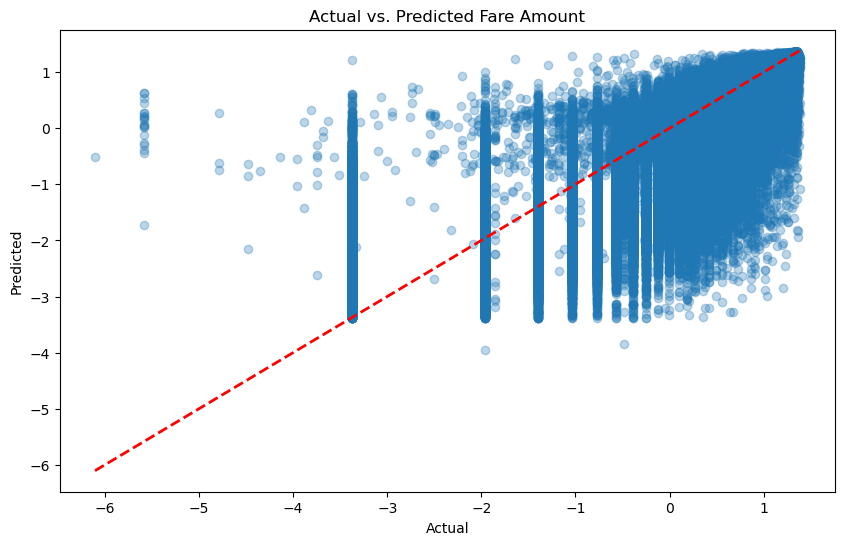

In [100]:
#Visualization: Visualize the actual vs predicted values to get a better understanding of where the model is making errors.
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Fare Amount')
plt.show()


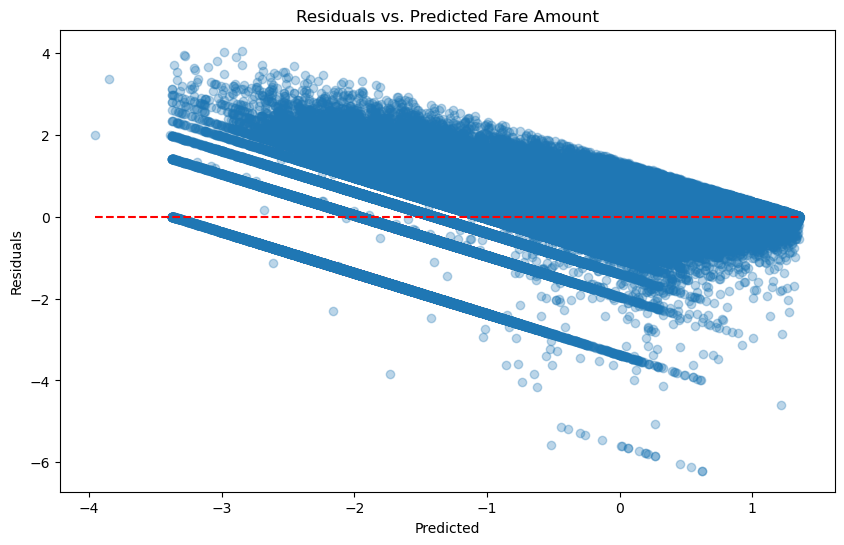

In [101]:
#Residual Analysis: Plot the residuals to check for any patterns that might suggest issues with the model.
residuals = y_test - predictions

plt.figure(figsize=(10,6))
plt.scatter(predictions, residuals, alpha=0.3)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Fare Amount')
plt.show()


In [102]:
# Remove rows where 'trip_distance' or 'fare_amount' are NaN.
from sklearn.ensemble import IsolationForest

df_clean.loc[:, 'anomaly'] = anomalies

df_clean = df.dropna(subset=['trip_distance', 'fare_amount'])

# Assuming 'trip_distance' and 'fare_amount' might contain outliers
anomaly_detector = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = anomaly_detector.fit_predict(df_clean[['trip_distance', 'fare_amount']])
df_clean['anomaly'] = anomalies


WARNING    /var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_7627/2985333154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly'] = anomalies
 [py.warnings]


In [103]:
#Anomaly Detection
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[['trip_distance', 'fare_amount']] = imputer.fit_transform(df[['trip_distance', 'fare_amount']])

# Now apply the Isolation Forest
anomaly_detector = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = anomaly_detector.fit_predict(df[['trip_distance', 'fare_amount']])
df['anomaly'] = anomalies


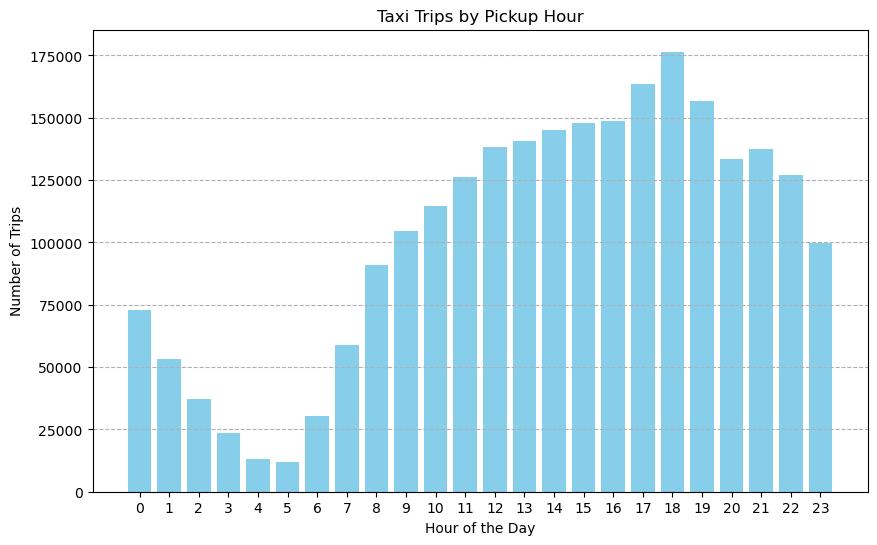

In [104]:
#Operational Insights: Peak Hours Analysis
# Group by 'pickup_hour' to identify peak hours
peak_hours = df.groupby('pickup_hour').size().reset_index(name='trips')
peak_hours.sort_values('trips', ascending=False, inplace=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(peak_hours['pickup_hour'], peak_hours['trips'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Taxi Trips by Pickup Hour')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour of the day
plt.grid(axis='y', linestyle='--')
plt.show()



In [105]:
df.dtypes

VendorID                      float32
tpep_dropoff_datetime         float64
passenger_count               float32
trip_distance                 float32
RatecodeID                    float32
store_and_fwd_flag               int8
PULocationID                  float32
DOLocationID                  float32
payment_type                  float32
fare_amount                   float32
extra                         float32
mta_tax                       float32
tip_amount                    float32
tolls_amount                  float32
improvement_surcharge         float32
total_amount                  float32
congestion_surcharge          float32
Airport_fee                   float32
pickup_hour                     int32
weekday                       float32
is_weekend                    float32
trip_duration                 float32
pickup_day                      int32
pickup_month                    int32
dropoff_hour                    int32
dropoff_day                     int32
dropoff_mont

In [106]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'weekday',
       'is_weekend', 'trip_duration', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour', 'is_holiday',
       'log_trip_distance', 'anomaly', 'dropoff_minute', 'dropoff_weekday'],
      dtype='object')

In [107]:
df.shape

(2452815, 34)

In [108]:
print(df.head)

<bound method NDFrame.head of                                 VendorID  tpep_dropoff_datetime  \
tpep_pickup_datetime_processed                                    
2023-07-01 00:29:59                  1.0           1.688172e+09   
2023-07-01 00:03:25                  2.0           1.688171e+09   
2023-07-01 00:38:29                  2.0           1.688173e+09   
2023-07-01 00:14:16                  2.0           1.688171e+09   
2023-07-01 00:11:15                  1.0           1.688171e+09   
...                                  ...                    ...   
2023-07-31 23:18:11                  2.0           1.690846e+09   
2023-07-31 23:29:31                  2.0           1.690847e+09   
2023-07-31 23:16:57                  2.0           1.690845e+09   
2023-07-31 23:29:00                  2.0           1.690847e+09   
2023-07-31 23:34:13                  2.0           1.690847e+09   

                                passenger_count  trip_distance  RatecodeID  \
tpep_pickup_datetime

In [109]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'fare_amount' is the target variable
# Selecting a subset of potential predictive features for the model
X = df[['passenger_count', 'trip_distance', 'pickup_hour', 'weekday', 'is_weekend', 'trip_duration']]
y = df['fare_amount']  # This is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with the GridSearchCV or any other model fitting process


In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['fare_amount'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


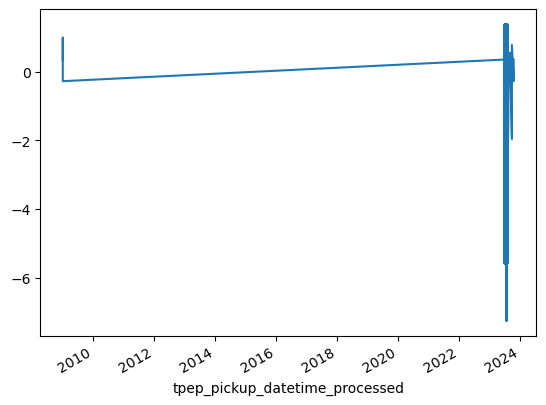

In [111]:
import matplotlib.pyplot as plt
df['fare_amount'].plot()
plt.savefig('/Users/bhanupodele/Downloads/fare_amount_report.pdf')


<Axes: xlabel='tpep_pickup_datetime_processed'>

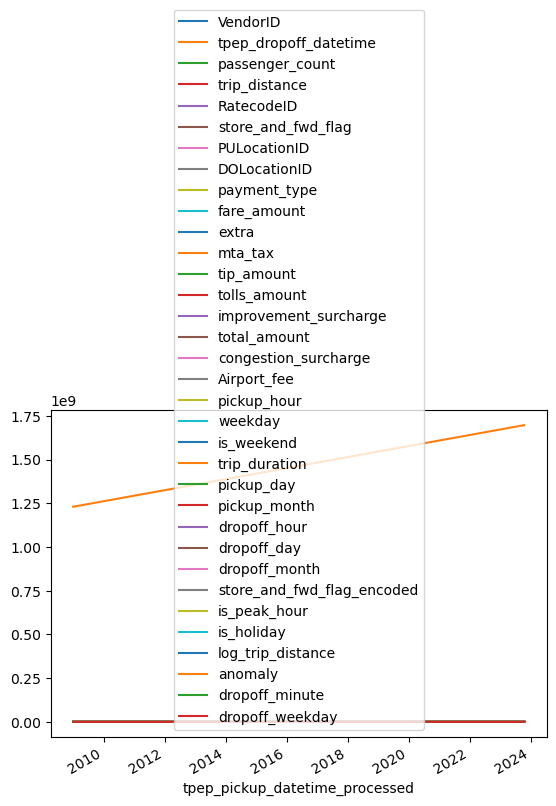

In [112]:
df.plot()


In [113]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'weekday',
       'is_weekend', 'trip_duration', 'pickup_day', 'pickup_month',
       'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'store_and_fwd_flag_encoded', 'is_peak_hour', 'is_holiday',
       'log_trip_distance', 'anomaly', 'dropoff_minute', 'dropoff_weekday'],
      dtype='object')

In [114]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['hour'] = df['tpep_dropoff_datetime'].dt.hour
df['day_of_week'] = df['tpep_dropoff_datetime'].dt.dayofweek
df['month'] = df['tpep_dropoff_datetime'].dt.month


In [115]:
# For binary categories
df['is_weekend'] = df['is_weekend'].map({False: 0, True: 1})

# For multiple categories (e.g., 'day_of_week'), use one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week'], prefix='weekday')


In [117]:
# For binary categories
df['is_weekend'] = df['is_weekend'].map({False: 0, True: 1})

# For multiple categories (e.g., 'day_of_week'), use one-hot encoding
df = pd.get_dummies(df, columns=['weekday'], prefix='weekday')


In [118]:
from sklearn.model_selection import train_test_split

X = df.drop(['total_amount', 'tpep_dropoff_datetime'], axis=1)  # Drop target variable and original datetime
y = df['total_amount']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
#Predictive Modeling for Demand Forecasting
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare your feature matrix X and target vector y'
X = df[['pickup_hour', 'RatecodeID', 'payment_type', 'is_peak_hour', 'is_weekend', 'is_holiday', 'PULocationID']]  # Include relevant features
y = df['total_amount']  # or another target variable indicating demand

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 0.8232760361198157


In [121]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
 [py.warnings]
WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
 [py.warnings]
WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
 [py.warnings]


In [122]:
#Deep Learning for Complex Pattern Recognition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


In [123]:
#Compile, Train, and Evaluate Your Model:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
model.evaluate(X_test, y_test)


Epoch 1/10
49057/49057 [==============================] - 18s 366us/step - loss: nan - val_loss: nan
Epoch 2/10
49057/49057 [==============================] - 17s 343us/step - loss: nan - val_loss: nan
Epoch 3/10
49057/49057 [==============================] - 17s 341us/step - loss: nan - val_loss: nan
Epoch 4/10
49057/49057 [==============================] - 17s 341us/step - loss: nan - val_loss: nan
Epoch 5/10
49057/49057 [==============================] - 17s 342us/step - loss: nan - val_loss: nan
Epoch 6/10
49057/49057 [==============================] - 17s 343us/step - loss: nan - val_loss: nan
Epoch 7/10
49057/49057 [==============================] - 17s 346us/step - loss: nan - val_loss: nan
Epoch 8/10
49057/49057 [==============================] - 17s 346us/step - loss: nan - val_loss: nan
Epoch 9/10
49057/49057 [==============================] - 17s 346us/step - loss: nan - val_loss: nan
Epoch 10/10
15331/15331 [==============================] - 3s 200us/step - loss: nan


nan

In [7]:
import pandas as pd

# Sample code to load your data
df = pd.read_csv(file_path, parse_dates=['tpep_dropoff_datetime'], index_col='tpep_dropoff_datetime')

/var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_11328/3559716045.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['tpep_dropoff_datetime'], index_col='tpep_dropoff_datetime')


<Axes: xlabel='tpep_dropoff_datetime'>

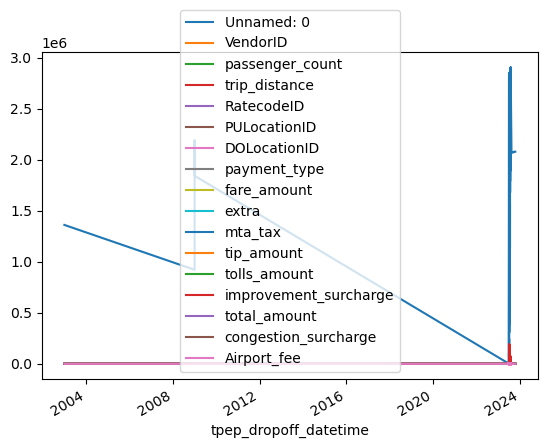

In [125]:
df.plot()


In [127]:
#Stationarity Check and Transformation: 

# Since 'tpep_dropoff_datetime' has already been set as the index, we don't need to convert it again
# Also, we don't need to set it as the index again

# Now you can directly resample the index since it's already a datetime
# For daily total fare
daily_fare_sum = df.resample('D')['total_amount'].sum()

# For daily trip count
daily_trip_count = df.resample('D').size()

# If you need hourly data, just replace 'D' with 'H'
hourly_fare_sum = df.resample('H')['total_amount'].sum()
hourly_trip_count = df.resample('H').size()





In [129]:
from statsmodels.tsa.stattools import adfuller


In [130]:
# Import the adfuller function if you haven't already
from statsmodels.tsa.stattools import adfuller

# Apply the Augmented Dickey-Fuller test on your aggregated data
result = adfuller(daily_fare_sum)  # or hourly_fare_sum if that's what you're testing

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -8.826218
p-value: 0.000000


In [131]:
result = adfuller(hourly_fare_sum)
# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])



ADF Statistic: -10.876802
p-value: 0.000000


In [132]:
#Fit ARIMA Model: 
from statsmodels.tsa.arima.model import ARIMA

# Let's assume you decided to use the daily total fare amount for forecasting
model = ARIMA(daily_fare_sum, order=(2,1,2))
model_fit = model.fit()


WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 [py.warnings]


In [133]:
#Forecast: Use the fitted model to make forecasts.
forecast = model_fit.forecast(steps=5)
print(forecast)


2023-10-17    17189.541238
2023-10-18    -7255.069944
2023-10-19   -21729.441389
2023-10-20     2484.526506
2023-10-21    14436.176989
Freq: D, Name: predicted_mean, dtype: float64


In [134]:
#Fit ARIMA Model: 
from statsmodels.tsa.arima.model import ARIMA

# Let's assume you decided to use the daily total fare amount for forecasting
model = ARIMA(daily_trip_count, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-10-17   -127.582585
2023-10-18    162.543353
2023-10-19   -213.203000
2023-10-20    158.630913
2023-10-21   -126.126463
Freq: D, Name: predicted_mean, dtype: float64


In [135]:
#Fit ARIMA Model: 
from statsmodels.tsa.arima.model import ARIMA

# Let's assume you decided to use the daily total fare amount for forecasting
model = ARIMA(hourly_fare_sum, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print(forecast)

WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 [py.warnings]
WARNING    /Users/bhanupodele/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 [py.warnings]


2023-10-16 22:00:00    41.904797
2023-10-16 23:00:00    51.384988
2023-10-17 00:00:00    55.823241
2023-10-17 01:00:00    58.550609
2023-10-17 02:00:00    59.514975
Freq: H, Name: predicted_mean, dtype: float64


In [136]:
#Fit ARIMA Model: 
from statsmodels.tsa.arima.model import ARIMA

# Let's assume you decided to use the daily total fare amount for forecasting
model = ARIMA(hourly_trip_count, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-10-16 22:00:00    1.720913
2023-10-16 23:00:00    2.036753
2023-10-17 00:00:00    2.253312
2023-10-17 01:00:00    2.388574
2023-10-17 02:00:00    2.474487
Freq: H, Name: predicted_mean, dtype: float64


In [137]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [138]:
#Time Series Forecasting Model
#Let's say we want to predict total_amount for future dates based on historical data.
#Aggregate Data by Time Interval for Time Series Analysis:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.set_index('tpep_pickup_datetime', inplace=True)
daily_totals = df.resample('D')['total_amount'].sum()


In [139]:
#Implement a Time Series Model (e.g., ARIMA or SARIMA):
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order and seasonal_order (p,d,q)(P,D,Q,s) - these need to be tuned
model = SARIMAX(daily_totals, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()

# Make forecast
forecast = results.get_forecast(steps=30)
predicted_means = forecast.predicted_mean



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22003D+01    |proj g|=  6.90628D-02


 This problem is unconstrained.



At iterate    5    f=  1.21565D+01    |proj g|=  1.24330D-02

At iterate   10    f=  1.21510D+01    |proj g|=  4.77330D-04

At iterate   15    f=  1.21508D+01    |proj g|=  4.39561D-05

At iterate   20    f=  1.21508D+01    |proj g|=  2.65581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   8.373D-06   1.215D+01
  F =   12.150769686191277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [143]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day_of_week', 'pickup_day', 'pickup_month'],
      dtype='object')

In [1]:
import pandas as pd

file_path =  "/Users/bhanupodele/my_nest_scripts/yellow_tripdata_2023-07.parquet"
df = pd.read_csv(file_path)


/var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_1487/2669610775.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
import pandas as pd

# Sample code to load your data
df = pd.read_csv(file_path, parse_dates=['tpep_dropoff_datetime'], index_col='tpep_dropoff_datetime')

/var/folders/x4/pyxxx_dd4zbbqtb_scfbdryh0000gn/T/ipykernel_1487/3559716045.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['tpep_dropoff_datetime'], index_col='tpep_dropoff_datetime')


In [3]:
# Assuming 'tpep_pickup_datetime' is the index
df.index = pd.to_datetime(df.index)
df['pickup_hour'] = df.index.hour
df['pickup_day_of_week'] = df.index.dayofweek
df['pickup_day'] = df.index.day
df['pickup_month'] = df.index.month

# Creating binary features for peak hours and weekends directly from the index
df['is_peak_hour'] = [1 if x in range(7, 10) or x in range(16, 19) else 0 for x in df.index.hour]
df['is_weekend'] = [1 if x >= 5 else 0 for x in df.index.dayofweek]


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = ['VendorID', 'RatecodeID', 'store_and_fwd_flag']
numerical_cols = ['trip_distance', 'pickup_hour', 'pickup_day', 'pickup_month', 'is_peak_hour', 'is_weekend']

# Create transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Separate features and target variable
X = df[numerical_cols + categorical_cols]
y = df['total_amount']  # Assuming you're predicting the total amount

# Apply transformations
X_processed = preprocessor.fit_transform(X)
y = y.values.ravel()  # Ensure y is the correct shape

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [5]:
#Model Training: Train a model using the processed data.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with less complexity
rf = RandomForestRegressor(n_estimators=50,  # fewer trees
                           min_samples_split=10,  # less splitting
                           max_features='sqrt',  # fewer features to consider
                           random_state=42,
                           n_jobs=-1)  # using all cores

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
predictions = rf.predict(X_test)


In [6]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")


RMSE: 11.218974296241015


/Users/bhanupodele/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


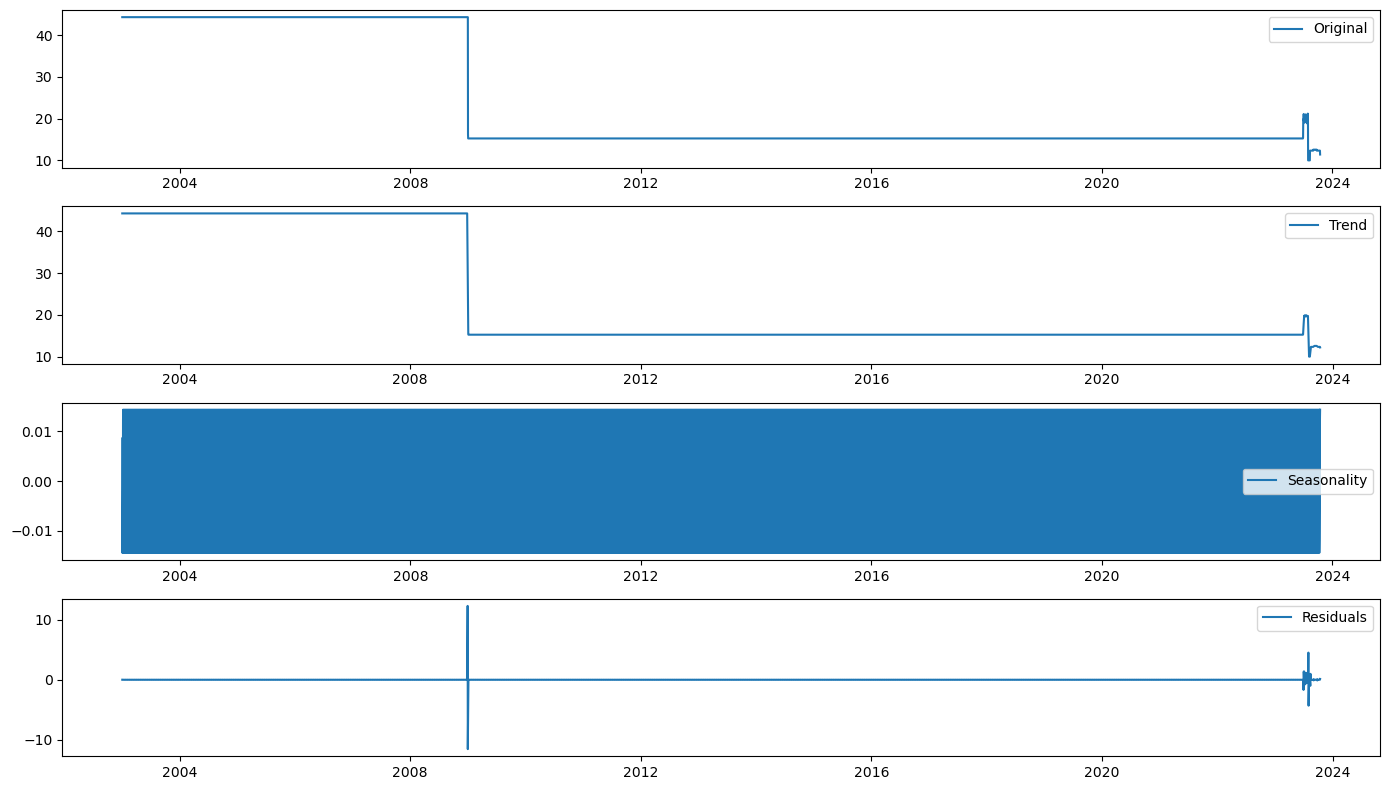

<Figure size 640x480 with 0 Axes>

In [7]:
#Time series decomposition
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame 'df' with a datetime index and a 'fare_amount' column
# Make sure your date column is in datetime format and set as the index
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.set_index('tpep_pickup_datetime', inplace=True)

# Resample data to a larger time frame if needed (e.g., hourly, daily, weekly)
# Here, I'm assuming you want to resample the data by day and take the average fare amount
df_resampled = df['fare_amount'].resample('D').mean()

# Fill any missing values that may have been introduced by resampling
df_resampled.fillna(method='ffill', inplace=True)

# Apply seasonal decompose
decomposition = seasonal_decompose(df_resampled, model='additive')

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(df_resampled, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# Show plot
plt.show()

# Save plot to file if needed
plt.savefig('decomposition.png')


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(10, 100),  # Test a smaller range of trees
    'max_features': ['sqrt'],  # Test fewer features
    'max_depth': [5, 10, None]  # Test fewer depths
}

# Initialize Randomized Search with fewer iterations and cross-validation folds
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=5,  # Fewer iterations
    cv=2,  # Fewer folds
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

# Perform the Randomized Search
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, None],
                                        'max_features': ['sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x290b3c210>},
                   random_state=42, scoring='neg_mean_squared_error')